### EXPERIMENTAL MATHEMATICS WITH SAGEMATHS PRESENTATION

#### GROUP MEMBERS:

The following persons collaborated to ensure the success of this project;
1. Samuel Senior Nyarko
2. Isaac Odoom Amanor
3. Ruth Jepkorir Chirchir
4. Kizito N. ODIZILIKE.

##### STATEMENT OF PROBLEM:
This project aims to utilize Sagemath tools and resources to define an interactive visualization to study the electric field and electric potential generated by a spherical charge distribution. The problem is centered around understanding how the electric field and potential behave both inside and outside the spherical shell as a function of distance (r) from the sphere's center.

##### INTRODUCTION:

This project is implemented to visualize the electric field and potential of a spherical charge distribution, illustrating key concepts in electrostatics such as, electrostatic potential, equipotential, field behavior, and boundary conditions. Using computational (SAGEMATH) tools, we compute the potential and field for both the inside and outside of the sphere and generate interactive plots for enhanced understanding. The steps involve defining mathematical expressions for the field and potential, implementing them in code, and creating contour and vector field plots. The ultimate goal is to provide a clear and interactive visualization to aid in comprehending electrostatic phenomena.

##### DEFINITION OF KEY TERMS:
1. ELECTRIC FIELD:

AN electric field is a  vector field that represents the force experienced by a unit positive charge at a point in space due to an electric charge distribution. It simply means the representation of imaginary lines around a charge where the electric force is experienced. 

This is expressed mathemtically as:$$
\vec{E} = \frac{\vec{F}}{q}
$$
where
- $\vec{E}$: Electric field vector at a point.
- $\vec{F}$: Force experienced by a test charge at that point (vector).
- $q$: Magnitude of the test charge (scalar).

The direction of $\vec{E}$ is the same as $\vec{F}$ for a positive test charge and opposite for a negative test charge.

2. ELECTROSTATIC POTENTIAL:

    A scalar quantity representing the work done per unit charge to move a charge from a far place to a specific point in the electric field.
It is expressed as :
$$
V(\mathbf{r}) = -\int_{\mathbf{r}_0}^{\mathbf{r}} \vec{E}
\cdot \vec{dl}
$$

3. GAUSS LAW:

Gauss's Law relates the electric flux through a closed surface to the charge enclosed within that surface. It is mathematically expressed as:

$$
\oint_{\mathcal{S}} \mathbf{E} \cdot d\mathbf{A} = \frac{Q_{\text{enc}}}{\epsilon_0}
$$

Where:
$$ \oint_{\mathcal{S}} \mathbf{E} \cdot d\mathbf{A}$$ is the electric flux through a closed surface $\mathcal{S}$,

$Q_{\text{enc}}$ is the total charge enclosed within the surface, and 

$ \epsilon_0 $ is the permittivity of free space.

In this project, our approach was to apply Gauss's Law to derive the electric field both inside and outside a spherical charge distribution. Gauss's Law simplifies the problem due to its symmetry, especially when dealing with spherical charge distributions like a point charge or uniformly charged sphere.

It is worthy to note that the charge is distributted on the surface of the spere and not on the inside and hence by Gauss's Law, the electric field inside the sphere is zero.

4. ITERACTIVE VISUALIZTION (SAGE INTERACT): A computational method enabling real time adjustments of parameters, providing dynamic insights into theoretical models and physical behaviors. In our project, the varying parameter is the distance $r$.

#### A. CODE WITH SLIDER

In [27]:
@interact
def visualize_sphere_field_and_potential(r=slider(0.1, 10, 0.1, default=2, label="Distance r")):
    """
    Interactive visualization of the electric field and potential
    due to a spherical surface charge distribution.
    Adjust the plots to show behavior at the specified distance 'r'.
    """
    # Parameters
    x,y=var('x,y')
    R = 2  # Radius of the sphere
    Q = 1  # Total charge on the sphere (arbitrary units)
    epsilon_0 = 1  # Permittivity of free space (arbitrary units)

    
    # Potential function for contour plot
    def potential(x, y):
        """
        Compute the electric potential at point (x, y).
        """
        r_mag = sqrt(x^2 + y^2)  # Distance from the origin
        if r_mag < R:
            return Q / (4 * pi * epsilon_0 * R)  # Inside: constant potential
        else:
            return Q / (4 * pi * epsilon_0 * r_mag)  # Outside: decreases as 1/r

    # Electric field components for vector plot
    def electric_field_components(x, y):
        """
        Compute the electric field components at point (x, y).
        """
        r_vec = vector([x, y])  # Position vector
        r_mag = sqrt(x^2 + y^2)  # Magnitude of r
        if r_mag < R:
            return (0, 0)  # Field is zero inside the sphere
        else:
            field_magnitude = Q / (4 * pi * epsilon_0 * r_mag^3)  # Field magnitude
            field_vec = field_magnitude * r_vec  # Scale the position vector
            return (field_vec[0], field_vec[1])  # Return components

    # Plot the potential at the specified r
    contour = contour_plot(
        lambda x, y: potential(x, y),  # Potential function
        (x, -r - 1, r + 1),  # Focus around the specified r
        (y, -r - 1, r + 1),
        contours=20,  # Number of contour levels
        cmap="coolwarm",  # Color map for the plot
        colorbar=True,  # Add colorbar for potential values
    )

    # Plot the electric field at the specified r
    field = plot_vector_field(
        (lambda x, y: electric_field_components(x, y)[0],  # x-component of the field
         lambda x, y: electric_field_components(x, y)[1]),  # y-component of the field
        (x, -r - 1, r + 1),  # Focus around the specified r
        (y, -r - 1, r + 1),
        axes_labels=["x", "y"],  # Labels for the axes
    )

    # Draw the sphere for context
    sphere = circle(
        (0, 0),  # Center of the sphere
        R,  # Radius of the sphere
        color="black",  # Color of the circle
        linestyle="--",  # Dashed line style
        legend_label="Spherical Charge",
    )

    # Add a title
    title_text = text(
        f"Electric Field and Potential at r = {r:.2f}",
        (-0.9, r + 2),  # Position the text above the plot
        fontsize=10,
        color="black",
    )

    # Combine all plots
    show(
        contour + field + sphere + title_text,
        figsize=8,
        aspect_ratio=1,
        
    )

   

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


#### B. ANIMATED CODE:

The animated version of the above code is added below to improve visual beauty of the work, though because of time constraints, we were unable to fix some few technical errors around the code. We hope to improve it later.

/usr/lib/python3/dist-packages/sage/plot/contour_plot.py:206: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,
/usr/lib/python3/dist-packages/matplotlib/quiver.py:658: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/lib/python3/dist-packages/matplotlib/quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


Animation with 50 frames
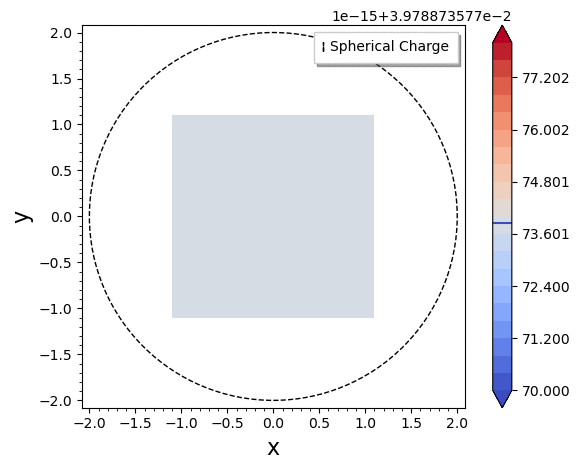

In [3]:

    # Parameters
    x, y = var('x, y')
    R = 2  # Radius of the sphere
    Q = 1  # Total charge on the sphere (arbitrary units)
    epsilon_0 = 1  # Permittivity of free space (arbitrary units)

    # Define the potential at distance r
    def potential(x, y, r):
        """
        Compute the electric potential at point (x, y) at distance r.
        """
        r_mag = sqrt(x**2 + y**2)  # Distance from the origin
        if r_mag < R:
            return Q / (4 * pi * epsilon_0 * R)  # Inside: constant potential
        else:
            return Q / (4 * pi * epsilon_0 * r_mag)  # Outside: decreases as 1/r

    # Electric field components for vector plot
    def electric_field_components(x, y, r):
        """
        Compute the electric field components at point (x, y) at distance r.
        """
        r_mag = sqrt(x**2 + y**2)  # Magnitude of r
        if r_mag < R:
            return (0, 0)  # Field is zero inside the sphere
        else:
            field_magnitude = Q / (4 * pi * epsilon_0 * r_mag**3)  # Field magnitude
            field_vec = field_magnitude * vector([x, y])  # Scale the position vector
            return (field_vec[0], field_vec[1])  # Return components

    

    # Generate a list of contours and vector field plots for different r values
    r_values = srange(0.1, 10, 0.2)  # Range of r values for the animation

    # Create empty lists to store the contour and field plots
    contours_list = []
    field_list = []
    sphere_list = []

    for r in r_values:
        # Create the contour plot for potential
        contour = contour_plot(
            lambda x, y: potential(x, y, r),
            (x, -r - 1, r + 1),  # Define the range for x axis
            (y, -r - 1, r + 1),  # Define the range for y axis
            contours=20, cmap="coolwarm", colorbar=True
        )

        # Create the vector field for electric field components
        field = plot_vector_field(
            (lambda x, y: electric_field_components(x, y, r)[0],  # x-component of the field
             lambda x, y: electric_field_components(x, y, r)[1]),  # y-component of the field
            (x, -r - 1, r + 1),
            (y, -r - 1, r + 1),
            axes_labels=["x", "y"],
        )

        # Create the sphere for the charge
        sphere = circle((0, 0), R, color="black", linestyle="--", legend_label="Spherical Charge")

        # Append the plots to the respective lists
        contours_list.append(contour)
        field_list.append(field)
        sphere_list.append(sphere)

    # Create the animation by combining the contours, fields, and sphere animations
    field_animation = animate(field_list)
    contour_animation = animate(contours_list)
    sphere_animation = animate(sphere_list)

    # Combine the animations for field, contour, and sphere
    final_animation = field_animation + contour_animation + sphere_animation

    # Show the final animation
    show(final_animation)


    

#### RELEVANCE OF PROJECT: 
1. The theoretical relevance of our project ranges from understanding electrostatics to exploration of boundary condtions and validation of the Gauss's Law.
   
2. Relevant for designing spherical capacitors or other charge storage devices where control of potential and field distributions is critical.

3. Understanding this concpet is important in shielding effects, so that durring lightening/thunder strikes, we dont get  cooked.

4. Medical Imaging and Physics:
Similar principles are used in MRI (Magnetic Resonance Imaging), where magnetic field distributions around a sphere are important.

5. Scientific Modeling:
Encourages mastery of numerical and symbolic computation techniques for solving and visualizing complex problems in electrodynamics and many others.

#### SUMMARY AND CONCLUSION:
Using interactive tools, we were able to examine how the electric field and potential change both inside and outside the sphere behaves, providing insight into the underlying physics.

The results demonstrate the inverse relationships between the electric field, potential, and distance from the spherical charge. This model is useful for understanding electrostatic fields in simple charge distributions. Further research could explore the effects of different charge distributions, such as non-uniform or multi-spherical charges, on the electric field and potential.